📘 **Note Format Guide**

This format serves as a structured guide for organizing lecture content, personal interpretation, experiments, and study-related questions.

| Type | What It Means | When I Use It |
|------|----------------|----------------|
| 📝 Lecture | Original material from the professor’s notes | When I’m referencing core concepts or provided code |
| 🗣️ In-Class Note | Verbal explanations shared during the lecture | When I want to record something the professor said in class but didn’t include in the official notes |
| ✍️ My Note | My thoughts, interpretations, or additional explanations | When I reflect on or explain something in my own words |
| 🔬 Experiment | Code I tried out or changed to explore further | When I test variations or go beyond the original example |
| ❓ Question | Questions I had while studying | When I want to revisit or research something more deeply |

📝
🗣️
✍️
🔬
❓

# 1. 강의노트 원본 및 영상 링크 📝

[https://guebin.github.io/DL2025/posts/11wk-1.html](https://guebin.github.io/DL2025/posts/11wk-1.html)

# 2. Imports 📝

In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = (4.5, 3.0)

In [269]:
# 지난시간복습
# 남여 출연자 -> 궁합점수 
## train 
# X1     X2  --> y
# 영식, 보람: 0.5 
# 영호, 하니: 4.5
## test 
# X1     X2  --> y
# 영호, 보람: ???
#---#
# 학습은 "X1: 영식 --> 2 --> [0,0,1,0,...0] --> linr([0,0,1,0,...0]) 특징추출" 이런식으로 진행되는데, 
# 이중에서 linr(onehot(x)) 의 패턴이 반복적으로 네트워크에서 사용된다. 

# 3. `torch.nn.Embedding` 📝

## A. 임베딩레이어 

`-` 모티브: `torch.nn.functional.one_hot` + `torch.nn.Linear` 를 매번 쓰는건 너무 귀찮지 않어? 

🗣️(

In [5]:
torch.manual_seed(43052)
#x  = ['옥순', '영숙', '하니', '옥순', '영숙'] 
x = torch.tensor([0,1,2,0,1])
linr = torch.nn.Linear(3,1,bias=False)
linr(torch.nn.functional.one_hot(x).float())

tensor([[-0.2002],
        [-0.4890],
        [ 0.2081],
        [-0.2002],
        [-0.4890]], grad_fn=<MmBackward0>)

- 지난 시간까지는 위처럼 했음

In [6]:
torch.manual_seed(43052)
#x  = ['옥순', '영숙', '하니', '옥순', '영숙'] 
x = torch.tensor([0,1,2,0,1])
X = torch.nn.functional.one_hot(x).float()
linr = torch.nn.Linear(3,1,bias=False)
linr(X)

tensor([[-0.2002],
        [-0.4890],
        [ 0.2081],
        [-0.2002],
        [-0.4890]], grad_fn=<MmBackward0>)

In [7]:
x, X

(tensor([0, 1, 2, 0, 1]),
 tensor([[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.],
         [1., 0., 0.],
         [0., 1., 0.]]))

In [8]:
linr.weight

Parameter containing:
tensor([[-0.2002, -0.4890,  0.2081]], requires_grad=True)

In [10]:
X @ linr.weight.T

tensor([[-0.2002],
        [-0.4890],
        [ 0.2081],
        [-0.2002],
        [-0.4890]], grad_fn=<MmBackward0>)

)🗣️

In [276]:
torch.manual_seed(43052)
#x  = ['옥순', '영숙', '하니', '옥순', '영숙'] 
x = torch.tensor([0,1,2,0,1])
X = torch.nn.functional.one_hot(x).float()
linr = torch.nn.Linear(3,1,bias=False)
linr(X)

tensor([[-0.2002],
        [-0.4890],
        [ 0.2081],
        [-0.2002],
        [-0.4890]], grad_fn=<MmBackward0>)

`-` 계산방식 

-   ${\boldsymbol x}= \begin{bmatrix} 0 \\ 1 \\ 2 \\ 0 \\ 1 \end{bmatrix} \Longrightarrow {\bf X}= \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \\ 1 & 0 & 0 \\ 0 & 1 & 0 \end{bmatrix}$

- $\text{linr}({\bf X})= \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \\ 1 & 0 & 0 \\ 0 & 1 & 0 \end{bmatrix}\begin{bmatrix} -0.2002 \\ -0.4890 \\ 0.2081 \end{bmatrix} = \begin{bmatrix} -0.2002 \\ -0.4890 \\ 0.2081 \\ -0.2002 \\ -0.4890 \end{bmatrix}$

`-` `torch.nn.functional.one_hot` + `torch.nn.Linear` 를 함께처리해주는 레이어 `torch.nn.Embedding` 존재 

🗣️(

- 다른 방식으로 할 수도 있음

In [13]:
torch.manual_seed(43052)
#x  = ['옥순', '영숙', '하니', '옥순', '영숙'] 
x = torch.tensor([0,1,2,0,1])
ebdd = torch.nn.Embedding(3,1)
ebdd(x) # 이렇게 하면 숫자들이 나옴 (위와는 다름)

tensor([[-0.8178],
        [-0.7052],
        [-0.5843],
        [-0.8178],
        [-0.7052]], grad_fn=<EmbeddingBackward0>)

In [14]:
#x  = ['옥순', '영숙', '하니', '옥순', '영숙'] 
x = torch.tensor([0,1,2,0,1])
ebdd = torch.nn.Embedding(3,1)
ebdd(x)

tensor([[-0.6179],
        [ 1.9949],
        [-0.4724],
        [-0.6179],
        [ 1.9949]], grad_fn=<EmbeddingBackward0>)

In [15]:
ebdd.weight

Parameter containing:
tensor([[-0.6179],
        [ 1.9949],
        [-0.4724]], requires_grad=True)

In [16]:
linr.weight

Parameter containing:
tensor([[-0.2002, -0.4890,  0.2081]], requires_grad=True)

```python
ebdd.weight.data = torch.tensor([[-0.2002],[-0.4890],[0.2081]]) # 이전 linr의 parameter로 덮어쓰면
```

In [17]:
torch.manual_seed(43052)
#x  = ['옥순', '영숙', '하니', '옥순', '영숙'] 
x = torch.tensor([0,1,2,0,1])
ebdd = torch.nn.Embedding(3,1)
ebdd.weight.data = torch.tensor([[-0.2002],[-0.4890],[0.2081]])
ebdd(x)

tensor([[-0.2002],
        [-0.4890],
        [ 0.2081],
        [-0.2002],
        [-0.4890]], grad_fn=<EmbeddingBackward0>)

In [18]:
linr(X) # 위와 동일

tensor([[-0.2002],
        [-0.4890],
        [ 0.2081],
        [-0.2002],
        [-0.4890]], grad_fn=<MmBackward0>)

- Embedding에는 one hot encoding 후 linr 을 할 때의 차원을 넣어주면 됨

)🗣️

In [288]:
#x  = ['옥순', '영숙', '하니', '옥순', '영숙'] 
x = torch.tensor([0,1,2,0,1])
ebdd = torch.nn.Embedding(3,1)
ebdd.weight.data = torch.tensor([[-0.2002],[-0.4890],[0.2081]])
ebdd(x)

tensor([[-0.2002],
        [-0.4890],
        [ 0.2081],
        [-0.2002],
        [-0.4890]], grad_fn=<EmbeddingBackward0>)

- $\text{ebdd}({\boldsymbol x})= \text{linr}\big(\text{onehot}({\boldsymbol x})\big) = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \\ 1 & 0 & 0 \\ 0 & 1 & 0 \end{bmatrix}\begin{bmatrix} -0.2002 \\ -0.4890 \\ 0.2081 \end{bmatrix} = \begin{bmatrix} -0.2002 \\ -0.4890 \\ 0.2081 \\ -0.2002 \\ -0.4890 \end{bmatrix}$

- 우리가 이전에 구현했던 코드 "onehot + linr" 와 "ebdd"는 정확하게 동일한 동작을 수행함. 

`-` 결론: 아래의 두개의 코드는 같다. 

```Python 
x= torch.tensor([0,1,2,0,1])

## 코드1 
linr = torch.nn.Linear(3,1) 
linr(torch.nn.functional.one_hot(x))

## 코드2 
ebdd = torch.nn.Embedding(3,1)
ebdd(x) 
```

## B. MF-based 추천시스템 재설계

아래의 자료를 활용하여 추천시스템을 설계하고자한다. 

In [19]:
df_view = pd.read_csv('https://raw.githubusercontent.com/guebin/DL2025/main/posts/iamsolo.csv',index_col=0)
df_view

,영식(IN),영철(IN),영호(IS),광수(IS),상철(EN),영수(EN),규빈(ES),다호(ES)
옥순(IN),NaN,4.02,3.45,3.42,0.84,1.12,0.43,0.49
영자(IN),3.93,3.99,3.63,3.43,0.98,0.96,0.52,NaN
정숙(IS),3.52,3.42,4.05,4.06,0.39,NaN,0.93,0.99
영숙(IS),3.43,3.57,NaN,3.95,0.56,0.52,0.89,0.89
순자(EN),1.12,NaN,0.59,0.43,4.01,4.16,3.52,3.38
현숙(EN),0.94,1.05,0.32,0.45,4.02,3.78,NaN,3.54
서연(ES),0.51,0.56,0.88,0.89,3.50,3.64,4.04,4.10
보람(ES),0.48,0.51,1.03,NaN,3.52,4.00,3.82,NaN
하니(I),4.85,4.82,NaN,4.98,4.53,4.39,4.45,4.52


In [20]:
df_train = df_view.stack().reset_index().set_axis(['W','M','y'],axis=1)
여성인덱스 = {'옥순(IN)':0, '영자(IN)':1, '정숙(IS)':2, '영숙(IS)':3, '순자(EN)':4, '현숙(EN)':5, '서연(ES)':6, '보람(ES)':7, '하니(I)':8}
남성인덱스 = {'영식(IN)':0, '영철(IN)':1, '영호(IS)':2, '광수(IS)':3, '상철(EN)':4, '영수(EN)':5, '규빈(ES)':6, '다호(ES)':7}
x1 = torch.tensor(df_train['W'].map(여성인덱스)) # length-n int vector 
x2 = torch.tensor(df_train['M'].map(남성인덱스)) # length-n int vector 
y = torch.tensor(df_train['y']).float().reshape(-1,1) # (n,1) float vector

임베딩레이어를 활용하여 MF-based 추천시스템을 설계하라. 

(풀이)

🗣️(

```python
# 지난 시간에는 x1이 one hot encoding 된 형태
X1 = torch.nn.functional.one_hot(x1)
```

In [23]:
x1 # 이제는 이 상태에서 바로 학습을 시키려고 함 (임베딩 레이어 활용)

tensor([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
        3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6,
        6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8])

- 이전 시간 코드를 참고하여 수정하면

```python
#----#
loss_fn = torch.nn.MSELoss() 
l1 = torch.nn.Linear(9,2,bias=False)
l2 = torch.nn.Linear(8,2,bias=False)
b1 = torch.nn.Linear(9,1,bias=False)
b2 = torch.nn.Linear(8,1,bias=False)
params = list(l1.parameters()) + list(l2.parameters())  + list(b1.parameters()) + list(b2.parameters())
optimizr = torch.optim.Adam(params) 
sig = torch.nn.Sigmoid()
#----#
for epoc in range(100):
    #step1
    W_features = l1(X1) 
    M_features = l2(X2)
    W_bias = b1(X1)
    M_bias = b2(X2)
    yhat = sig((W_features * M_features).sum(axis=1).reshape(-1,1) + W_bias + M_bias)*5
    #step2
    loss = loss_fn(yhat,y)
    #stpe3
    loss.backward()
    #step4
    optimizr.step()
    optimizr.zero_grad()
```

In [24]:
#df_view
loss_fn = torch.nn.MSELoss() 
ebdd1 = torch.nn.Embedding(9,2)
ebdd2 = torch.nn.Embedding(8,2)
b1 = torch.nn.Embedding(9,1)
b2 = torch.nn.Embedding(8,1)
params = list(ebdd1.parameters()) + list(ebdd2.parameters())  + list(b1.parameters()) + list(b2.parameters())
optimizr = torch.optim.Adam(params)
sig = torch.nn.Sigmoid()
#----#
for epoc in range(5000):
    #step1
    W_features = ebdd1(x1) 
    M_features = ebdd2(x2) 
    W_bias = b1(x1)
    M_bais = b2(x2)
    yhat = sig((W_features * M_features).sum(axis=1).reshape(-1,1) + W_bias + M_bais)*5
    #step2
    loss = loss_fn(yhat,y)
    #step3
    loss.backward()
    #step4
    optimizr.step()
    optimizr.zero_grad()

In [25]:
y[:5], yhat[:5] # 그럭저럭 잘 맞추고 있음

(tensor([[4.0200],
         [3.4500],
         [3.4200],
         [0.8400],
         [1.1200]]),
 tensor([[3.6066],
         [3.6236],
         [3.6976],
         [0.7890],
         [0.8583]], grad_fn=<SliceBackward0>))

)🗣️

In [325]:
#df_view
loss_fn = torch.nn.MSELoss() 
ebdd1 = torch.nn.Embedding(9,2)
ebdd2 = torch.nn.Embedding(8,2)
b1 = torch.nn.Embedding(9,1)
b2 = torch.nn.Embedding(8,1)
params = list(ebdd1.parameters()) + list(ebdd2.parameters())  + list(b1.parameters()) + list(b2.parameters())
optimizr = torch.optim.Adam(params)
sig = torch.nn.Sigmoid()
#----#
for epoc in range(5000):
    #step1
    W_features = ebdd1(x1) 
    M_features = ebdd2(x2) 
    W_bias = b1(x1)
    M_bais = b2(x2)
    yhat = sig((W_features * M_features).sum(axis=1).reshape(-1,1) + W_bias + M_bais)*5
    #step2
    loss = loss_fn(yhat,y)
    #step3
    loss.backward()
    #step4
    optimizr.step()
    optimizr.zero_grad()

In [326]:
y[:5], yhat[:5]

(tensor([[4.0200],
         [3.4500],
         [3.4200],
         [0.8400],
         [1.1200]]),
 tensor([[3.9809],
         [3.4865],
         [3.4730],
         [0.8163],
         [0.9715]], grad_fn=<SliceBackward0>))

# 4. 사용자정의 네트워크 📝

🗣️(

- yhat을 간단히 구하고 싶음

```python
#----#
for epoc in range(5000):
    #step1
    # W_features = ebdd1(x1) 
    # M_features = ebdd2(x2) 
    # W_bias = b1(x1)
    # M_bais = b2(x2)
    # yhat = sig((W_features * M_features).sum(axis=1).reshape(-1,1) + W_bias + M_bais)*5
    yhat = net(x1,x2) # 이런 식으로
    #step2
    loss = loss_fn(yhat,y)
    #step3
    loss.backward()
    #step4
    optimizr.step()
    optimizr.zero_grad()
```

)🗣️

## A. 사용자정의 네트워크 사용법

`# 예비학습1`: `net(X)`와 사실 `net.forward(X)`는 같다.

🗣️(

In [26]:
net = torch.nn.Sequential(
    torch.nn.Linear(1,1),
    torch.nn.Sigmoid()
)

In [27]:
X = torch.randn(5,1)
net(X)

tensor([[0.5705],
        [0.7858],
        [0.8796],
        [0.8451],
        [0.8138]], grad_fn=<SigmoidBackward0>)

In [28]:
net.forward(X)

tensor([[0.5705],
        [0.7858],
        [0.8796],
        [0.8451],
        [0.8138]], grad_fn=<SigmoidBackward0>)

- net(X)과 net.forward(X)는 동일
- net.forward(X)는 function이어서 이를 통해 nex(X)를 다시 정의할 수 있음

In [29]:
def func(x):
    return "메롱"

In [31]:
func(33)

'메롱'

In [32]:
func('sss')

'메롱'

In [33]:
net.forward = func

In [34]:
net.forward(X)

'메롱'

In [35]:
net(X)

'메롱'

)🗣️

In [339]:
net = torch.nn.Sequential(
    torch.nn.Linear(1,1),
    torch.nn.Sigmoid()
)
X = torch.randn(5,1)

In [341]:
net(X)
#net.forward(X)

tensor([[0.3340],
        [0.4480],
        [0.3143],
        [0.2375],
        [0.2066]], grad_fn=<SigmoidBackward0>)

그래서 `net.forward`를 재정의하면 `net(X)`의 기능을 재정의 할 수 있다.

In [342]:
def func(x):
    return "메롱"

In [348]:
net.forward = func 

In [349]:
net.forward(X) 

'메롱'

In [350]:
net(X)

'메롱'

`#`

`# 예비학습2`: `torch.nn.Module`을 상속받아서 네트워크를 만들면 (= “`class XXX(torch.nn.Module):`” 와 같은 방식으로 클래스를 선언하면) 약속된 아키텍처를 가진 네트워크를 찍어내는 함수를 만들 수 있다.

:::{.callout-note}
클래스의 기초가 부족한 분들은 아래의 링크에서 

- <https://guebin.github.io/PP2024/> 

`11wk-2`, `12wk-2`, `13wk-2`, `14wk-2` 에 대한내용을 학습하시길 바랍니다. 
:::

 - 🗣️ 이전에 만든 사용자 정의 레이어와 방식 비슷

(예제1) -- `torch.nn.Module`의 상속을 이용하여 아래와 동일한 아키텍처를 가지는 네트워크를 설계하라. 

In [377]:
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=1,bias=True), # linr1
    torch.nn.Sigmoid(),#sig
    torch.nn.Linear(in_features=1,out_features=1,bias=False) # linr2 
)

In [378]:
x = torch.tensor([[1.0]])

In [379]:
net(x)

tensor([[-0.5737]], grad_fn=<MmBackward0>)

(풀이)

🗣️(

In [46]:
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=1,bias=True), # linr1
    torch.nn.Sigmoid(),#sig
    torch.nn.Linear(in_features=1,out_features=1,bias=False) # linr2 
)

In [47]:
x = torch.tensor([[1.0]])

In [48]:
net(x)

tensor([[-0.3695]], grad_fn=<MmBackward0>)

In [40]:
class MyNet1(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linr1 = torch.nn.Linear(in_features=1,out_features=1,bias=True)
        self.sig = torch.nn.Sigmoid()
        self.linr2 = torch.nn.Linear(in_features=1,out_features=1,bias=False)
    def forward(self,x):
        #net(x): x --> linr --> sig --> linr
        out = self.linr2(self.sig(self.linr1(x))) # 구분을 위해 linr1 linr2
        return out

In [49]:
net = MyNet1()

In [50]:
net(x) # 값은 달라지지만 동일한 기능을 수행

tensor([[-0.0929]], grad_fn=<MmBackward0>)

)🗣️

In [386]:
class MyNet1(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linr1 = torch.nn.Linear(in_features=1,out_features=1,bias=True)
        self.sig = torch.nn.Sigmoid()
        self.linr2 = torch.nn.Linear(in_features=1,out_features=1,bias=False)
    def forward(self,x):
        out = self.linr2(self.sig(self.linr1(x)))
        return out 

(예시2) --  `torch.nn.Module`의 상속을 이용하여 아래와 동일한 동작을 하는 네트워크를 설계하라. 

In [389]:
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=1,bias=True),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=1,out_features=1,bias=False)
)

(풀이)

In [390]:
class MyNet2(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linr1 = torch.nn.Linear(in_features=1,out_features=1,bias=True)
        self.relu = torch.nn.ReLU()
        self.linr2 = torch.nn.Linear(in_features=1,out_features=1,bias=False)
    def forward(self,X):
        netout = self.linr2(self.relu(self.linr1(x)))
        return netout

***사용자 정의 네트워크를 만드는 방법***

**step1:** 아래와 코드를 복사하여 틀을 만든다. (이건 무조건 고정임, XXXX 자리는 원하는 이름을 넣는다)

``` python
class XXXX(torch.nn.Module):
    def __init__(self):
        super().__init__()
        ## 우리가 netout을 구할때 사용할 레이어를 정의 
        
        ## 정의 끝
    def forward(self,X):
        ## netout을 어떻게 구할것인지 정의 
        
        ## 정의 끝
        return netout
```

- `forward`의 입력: `X`는 `net(X)`에 사용하는 `X`임
- `forward`의 출력: `netout`은 `net.forward(X)` 함수의 리턴값임
-  당연히 `X`/`netout`은 다른 변수로 써도 무방 (예를들면 `input`/`output` 이라든지) 

**step2:** `def __init__(self):`에 yhat을 구하기 위해 필요한 재료를 레이어를 정의하고 이름을 붙인다. 이름은 항상 `self.xxx` 와 같은 식으로 정의한다.

``` python
class XXXX(torch.nn.Module):
    def __init__(self):
        super().__init__()
        ## 우리가 netout을 구할때 사용할 레이어를 정의 
        self.xxx1 = torch.nn.Linear(in_features=1,out_features=1,bias=True)
        self.xxx2 = torch.nn.Sigmoid()
        self.xxx3 = torch.nn.Linear(in_features=1,out_features=1,bias=True)
        ## 정의 끝
    def forward(self,X):
        ## netout을 어떻게 구할것인지 정의 
        
        ## 정의 끝
        return netout
```

**step3:** `def forward:`에 "X –\> netout" 으로 가는 과정을 묘사한 코드를 작성하고 netout을 리턴하도록 한다.

``` python
class XXXX(torch.nn.Module):
    def __init__(self):
        super().__init__()
        ## 우리가 netout 구할때 사용할 레이어를 정의 
        self.xxx1 = torch.nn.Linear(in_features=1,out_features=1,bias=True)
        self.xxx2 = torch.nn.Sigmoid()
        self.xxx3 = torch.nn.Linear(in_features=1,out_features=1,bias=True)
        ## 정의 끝
    def forward(self,X):
        ## netout을 어떻게 구할것인지 정의 
        u = self.xxx1(X) 
        v = self.xxx2(u)
        netout = self.xxx3(v) 
        ## 정의 끝
        return netout
```

`#`

`# 실습(2025-중간고사 4번)`: 자유 낙하 운동이란 어떤 물체가 일정한 높이에서 떨어져 지면에 도달하기 까지 걸리는 시간을 다루는 물리학 개념이다.  다음은 물리학의 자유 낙하 운동에서 착안하여 생성한 데이터이다.

In [51]:
torch.manual_seed(43052)
h = torch.rand(100)*100
h,_ = h.sort()
h = h.reshape(100,1)
t = torch.sqrt(2*h/9.8) + torch.randn([100,1])*0.1

여기에서 $h$는 낙하전의 높이(단위: m), $t$는 해당높이에서 물치가 지면에 도달하기 까지 걸리는 시간(단위:초)을 의미한다. 예를 들어 아래의 자료는 $h=99.3920, t=4.4583$를 의미하는데 

In [52]:
h[-1], t[-1]

(tensor([99.3920]), tensor([4.4583]))

이것은 높이 $99.3920$m에서 낙하한 물체가 약 $4.4583$초만에 지면에 도달했음을 의미한다. 아래의 그림은 $x$축에 $h$, $y$축에 $t$를 두고 해당 데이터를 산점도로 시각화 한 것이다. 

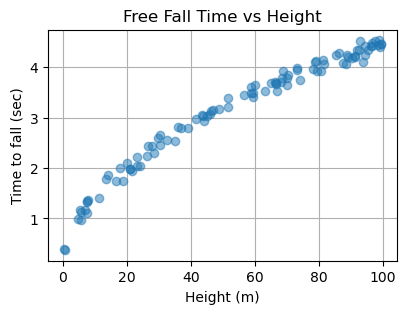

In [53]:
plt.plot(h,t,'o',alpha=0.5)
plt.xlabel('Height (m)')
plt.ylabel('Time to fall (sec)')
plt.title('Free Fall Time vs Height')
plt.grid(True)
plt.show()

그래프를 보면 높이가 높을 수록 낙하시간도 길어지는 경향이 관찰된다. 다만 동일한 높이라 하더라도 낙하시간이 조금씩 차이나는 경우가 있는데, 이는 사람이 시간측정을 수동으로 하며 발생하는 실험오차 때문이다. 이러한 오차에도 불구하고 $h$와 $t$사이에는 일정한 규칙이 존재하는듯 하다. 물리학과 교수님께 자문을 요청한 결과 자유낙하에 걸리는 시간은 $\sqrt{h}$에 비례함을 알 수 있었고 이를 근거로 아래와 같은 모형을 설계하였다. 

$$t_i = \beta_0 + \beta_1 \sqrt{h_i}+\epsilon_i, \quad \epsilon_i \sim {\cal N}(0,\sigma^2)$$

위의 모형을 활용하여 높이 $h$로부터 낙하시간 $t$를 예측하는 신경망 모델을 설계하고 학습하라. 학습한 신경망 모델을 활용하여 높이 40m,60m,80m 에서 물체를 자유낙하 시켰을때 지면에 도달하기까지 걸리는 시간을 각각 예측하라. 

(풀이)

🗣️(

- h --> sqrt --> linr --> t_hat

In [54]:
class FreeFallNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linr = torch.nn.Linear(1,1)
    def forward(self,h):
        netout = self.linr(torch.sqrt(h))
        return netout

In [55]:
net = FreeFallNet()
loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.Adam(net.parameters())
#---#
for epoc in range(2000):
    #1
    netout = net(h)
    #2
    loss = loss_fn(netout,t)
    #3
    loss.backward()
    #4
    optimizr.step()
    optimizr.zero_grad()

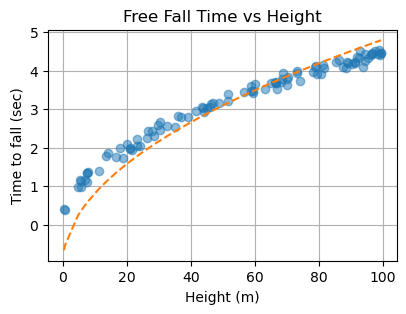

In [56]:
plt.plot(h,t,'o',alpha=0.5)
plt.xlabel('Height (m)')
plt.ylabel('Time to fall (sec)')
plt.title('Free Fall Time vs Height')
plt.plot(h,net(h).data,'--')
plt.grid(True)
plt.show()

In [57]:
net = FreeFallNet()
loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.Adam(net.parameters())
#---#
for epoc in range(10000):
    #1
    netout = net(h)
    #2
    loss = loss_fn(netout,t)
    #3
    loss.backward()
    #4
    optimizr.step()
    optimizr.zero_grad()

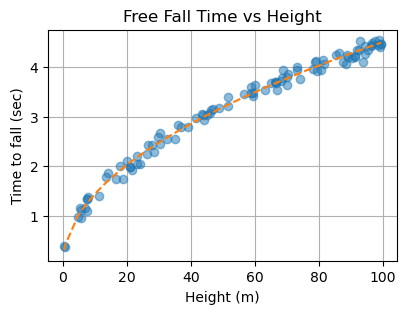

In [58]:
plt.plot(h,t,'o',alpha=0.5)
plt.xlabel('Height (m)')
plt.ylabel('Time to fall (sec)')
plt.title('Free Fall Time vs Height')
plt.plot(h,net(h).data,'--')
plt.grid(True)
plt.show()

- 코드가 깔끔함

In [59]:
hh = torch.tensor([20,30,40,50,60,70]).reshape(6,1)
net(hh)

tensor([[2.0253],
        [2.4746],
        [2.8534],
        [3.1872],
        [3.4889],
        [3.7664]], grad_fn=<AddmmBackward0>)

```python
# 지난 시간 코드 (xx 추가됨)
hh = torch.tensor([40,60,80]).float().reshape(3,1)
xx = torch.sqrt(hh)
net(xx)
```

)🗣️

In [405]:
class FreeFallNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linr = torch.nn.Linear(1,1)
    def forward(self,h):
        netout = self.linr(torch.sqrt(h))
        return netout    

In [406]:
net = FreeFallNet()
loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.Adam(net.parameters())
#---#
for epoc in range(10000):
    #1
    netout = net(h)
    #2
    loss = loss_fn(netout,t)
    #3
    loss.backward()
    #4 
    optimizr.step()
    optimizr.zero_grad()

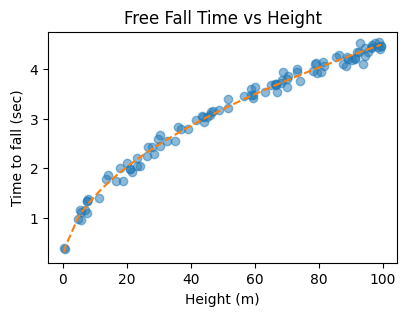

In [407]:
plt.plot(h,t,'o',alpha=0.5)
plt.xlabel('Height (m)')
plt.ylabel('Time to fall (sec)')
plt.title('Free Fall Time vs Height')
plt.plot(h,net(h).data,'--')

In [410]:
hh = torch.tensor([20,30,40,50,60,70]).reshape(6,1)
net(hh)

tensor([[2.0253],
        [2.4746],
        [2.8534],
        [3.1872],
        [3.4889],
        [3.7664]], grad_fn=<AddmmBackward0>)

`#`

## B. MF-based 추천시스템 재설계

아래의 자료를 활용하여 추천시스템을 설계하고자한다. 

In [60]:
df_view = pd.read_csv('https://raw.githubusercontent.com/guebin/DL2024/main/posts/solo.csv',index_col=0)
df_view

,영식(IN),영철(IN),영호(IS),광수(IS),상철(EN),영수(EN),규빈(ES),다호(ES)
옥순(IN),NaN,4.02,3.45,3.42,0.84,1.12,0.43,0.49
영자(IN),3.93,3.99,3.63,3.43,0.98,0.96,0.52,NaN
정숙(IS),3.52,3.42,4.05,4.06,0.39,NaN,0.93,0.99
영숙(IS),3.43,3.57,NaN,3.95,0.56,0.52,0.89,0.89
순자(EN),1.12,NaN,0.59,0.43,4.01,4.16,3.52,3.38
현숙(EN),0.94,1.05,0.32,0.45,4.02,3.78,NaN,3.54
서연(ES),0.51,0.56,0.88,0.89,3.50,3.64,4.04,4.10
보람(ES),0.48,0.51,1.03,NaN,3.52,4.00,3.82,NaN
하니(I),4.85,4.82,NaN,4.98,4.53,4.39,4.45,4.52


사용자정의 네트워크를 이용하여 MF-based 추천시스템을 설계하라. 

(풀이1) -- `net(x1,x2)`

🗣️(

- 이전 풀이가 너무 복잡하여 yhat을 다음과 같이 바꾸고 싶음

```python
#df_view
loss_fn = torch.nn.MSELoss() 
ebdd1 = torch.nn.Embedding(9,2)
ebdd2 = torch.nn.Embedding(8,2)
b1 = torch.nn.Embedding(9,1)
b2 = torch.nn.Embedding(8,1)
params = list(ebdd1.parameters()) + list(ebdd2.parameters())  + list(b1.parameters()) + list(b2.parameters())
optimizr = torch.optim.Adam(params)
sig = torch.nn.Sigmoid()
#----#
for epoc in range(5000):
    #step1
    # W_features = ebdd1(x1) 
    # M_features = ebdd2(x2) 
    # W_bias = b1(x1)
    # M_bais = b2(x2)
    # yhat = sig((W_features * M_features).sum(axis=1).reshape(-1,1) + W_bias + M_bais)*5
    yhat = net(x1,x2)
    #step2
    loss = loss_fn(yhat,y)
    #step3
    loss.backward()
    #step4
    optimizr.step()
    optimizr.zero_grad()
```

- 이에 맞춰 network를 설계하면

In [66]:
#df_view
class MFbased1(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.ebdd1 = torch.nn.Embedding(9,2)
        self.ebdd2 = torch.nn.Embedding(8,2)
        self.b1 = torch.nn.Embedding(9,1)
        self.b2 = torch.nn.Embedding(8,1)
        self.sig = torch.nn.Sigmoid()
    def forward(self,x1,x2):
        W_features = self.ebdd1(x1) 
        M_features = self.ebdd2(x2) 
        W_bias = self.b1(x1)
        M_bais = self.b2(x2)
        yhat = self.sig((W_features * M_features).sum(axis=1).reshape(-1,1) + W_bias + M_bais)*5
        return yhat

net = MFbased1()
loss_fn = torch.nn.MSELoss() 
# params = list(ebdd1.parameters()) + list(ebdd2.parameters())  + list(b1.parameters()) + list(b2.parameters())
# 이렇게 net을 선언하면 net.parameters()와 동일
optimizr = torch.optim.Adam(net.parameters())
#----#
for epoc in range(10000):
    #step1
    yhat = net(x1,x2)
    #step2
    loss = loss_fn(yhat,y)
    #step3
    loss.backward()
    #step4
    optimizr.step()
    optimizr.zero_grad()

In [67]:
y[:5], yhat[:5] # 잘 적합됨

(tensor([[4.0200],
         [3.4500],
         [3.4200],
         [0.8400],
         [1.1200]]),
 tensor([[4.0793],
         [3.4667],
         [3.3657],
         [0.9102],
         [0.9532]], grad_fn=<SliceBackward0>))

In [69]:
# list(net.parameters()) # parameter == 이전 params 확인 코드

)🗣️

In [420]:
#df_view
class MFbased1(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.ebdd1 = torch.nn.Embedding(9,2)
        self.ebdd2 = torch.nn.Embedding(8,2)
        self.b1 = torch.nn.Embedding(9,1)
        self.b2 = torch.nn.Embedding(8,1)        
        self.sig = torch.nn.Sigmoid()
    def forward(self,x1,x2):
        W_features = self.ebdd1(x1) 
        M_features = self.ebdd2(x2) 
        W_bias = self.b1(x1)
        M_bais = self.b2(x2)
        yhat = self.sig((W_features * M_features).sum(axis=1).reshape(-1,1) + W_bias + M_bais)*5        
        return yhat
net = MFbased1()
loss_fn = torch.nn.MSELoss() 
optimizr = torch.optim.Adam(net.parameters())
#----#
for epoc in range(10000):
    #step1
    yhat = net(x1,x2)
    #step2
    loss = loss_fn(yhat,y)
    #step3
    loss.backward()
    #step4
    optimizr.step()
    optimizr.zero_grad()

In [421]:
y[:5], yhat[:5]

(tensor([[4.0200],
         [3.4500],
         [3.4200],
         [0.8400],
         [1.1200]]),
 tensor([[4.0800],
         [3.4664],
         [3.3650],
         [0.9111],
         [0.9538]], grad_fn=<SliceBackward0>))

(풀이2) -- `net(X)`

🗣️(

In [70]:
x1, x2

(tensor([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
         3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6,
         6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8]),
 tensor([1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 6, 7, 0, 1, 3,
         4, 5, 6, 7, 0, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 7, 0, 1, 2, 3, 4, 5,
         6, 7, 0, 1, 2, 4, 5, 6, 0, 1, 3, 4, 5, 6, 7]))

In [71]:
X = torch.stack([x1,x2],axis=1) 

In [73]:
class MFbased2(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.ebdd1 = torch.nn.Embedding(9,2)
        self.ebdd2 = torch.nn.Embedding(8,2)
        self.b1 = torch.nn.Embedding(9,1)
        self.b2 = torch.nn.Embedding(8,1)        
        self.sig = torch.nn.Sigmoid()
    def forward(self,X):
        x1 = X[:,0] # 분리
        x2 = X[:,1]
        W_features = self.ebdd1(x1) 
        M_features = self.ebdd2(x2) 
        W_bias = self.b1(x1)
        M_bais = self.b2(x2)
        yhat = self.sig((W_features * M_features).sum(axis=1).reshape(-1,1) + W_bias + M_bais)*5        
        return yhat
net = MFbased2()
loss_fn = torch.nn.MSELoss() 
optimizr = torch.optim.Adam(net.parameters())
#----#
for epoc in range(10000):
    #step1
    yhat = net(X)
    #step2
    loss = loss_fn(yhat,y)
    #step3
    loss.backward()
    #step4
    optimizr.step()
    optimizr.zero_grad()

In [74]:
y[:5], yhat[:5] # 잘 적합됨

(tensor([[4.0200],
         [3.4500],
         [3.4200],
         [0.8400],
         [1.1200]]),
 tensor([[4.0800],
         [3.4664],
         [3.3651],
         [0.9111],
         [0.9538]], grad_fn=<SliceBackward0>))

- 사용자 정의 네트워크를 이용하면 지저분한 부분을 위에(class) 몰아넣고 아래는 깔끔하게 정리할 수 있음

)🗣️

In [439]:
X = torch.stack([x1,x2],axis=1) 

In [440]:
class MFbased2(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.ebdd1 = torch.nn.Embedding(9,2)
        self.ebdd2 = torch.nn.Embedding(8,2)
        self.b1 = torch.nn.Embedding(9,1)
        self.b2 = torch.nn.Embedding(8,1)        
        self.sig = torch.nn.Sigmoid()
    def forward(self,X):
        x1 = X[:,0]
        x2 = X[:,1]
        W_features = self.ebdd1(x1) 
        M_features = self.ebdd2(x2) 
        W_bias = self.b1(x1)
        M_bais = self.b2(x2)
        yhat = self.sig((W_features * M_features).sum(axis=1).reshape(-1,1) + W_bias + M_bais)*5        
        return yhat
net = MFbased2()
loss_fn = torch.nn.MSELoss() 
optimizr = torch.optim.Adam(net.parameters())
#----#
for epoc in range(10000):
    #step1
    yhat = net(X)
    #step2
    loss = loss_fn(yhat,y)
    #step3
    loss.backward()
    #step4
    optimizr.step()
    optimizr.zero_grad()

In [441]:
y[:5], yhat[:5]

(tensor([[4.0200],
         [3.4500],
         [3.4200],
         [0.8400],
         [1.1200]]),
 tensor([[4.0800],
         [3.4664],
         [3.3651],
         [0.9111],
         [0.9538]], grad_fn=<SliceBackward0>))

# 5. MF-based 추천시스템을 넘어서 📝

🗣️(

```
MF = Matrix Factorization = 행렬분해(SVD)
W_feature
M_feature
W_bias
M_bias

yhat = (W_feature*M_feature).sum(axis=1).reshape(-1,1) + 바이어스
이러한 아키텍쳐를 생각하는게 되게 특이한 방식임
#---#
[W_feature, M_feature, W_bias, M_bias]
(n,2) (n,2) (n,1) (n,1) ---> (n,6) --->> yhat : Neural Network
```

)🗣️

## A. NN-based 방식 

아래의 자료를 활용하여 추천시스템을 설계하고자한다. 

In [75]:
df_view = pd.read_csv('https://raw.githubusercontent.com/guebin/DL2025/main/posts/iamsolo.csv',index_col=0)
df_view

,영식(IN),영철(IN),영호(IS),광수(IS),상철(EN),영수(EN),규빈(ES),다호(ES)
옥순(IN),NaN,4.02,3.45,3.42,0.84,1.12,0.43,0.49
영자(IN),3.93,3.99,3.63,3.43,0.98,0.96,0.52,NaN
정숙(IS),3.52,3.42,4.05,4.06,0.39,NaN,0.93,0.99
영숙(IS),3.43,3.57,NaN,3.95,0.56,0.52,0.89,0.89
순자(EN),1.12,NaN,0.59,0.43,4.01,4.16,3.52,3.38
현숙(EN),0.94,1.05,0.32,0.45,4.02,3.78,NaN,3.54
서연(ES),0.51,0.56,0.88,0.89,3.50,3.64,4.04,4.10
보람(ES),0.48,0.51,1.03,NaN,3.52,4.00,3.82,NaN
하니(I),4.85,4.82,NaN,4.98,4.53,4.39,4.45,4.52


In [76]:
#df_view
df_train = df_view.stack().reset_index().set_axis(['여성출연자','남성출연자','궁합점수'],axis=1)
여성인덱스 = {'옥순(IN)':0, '영자(IN)':1, '정숙(IS)':2, '영숙(IS)':3, '순자(EN)':4, '현숙(EN)':5, '서연(ES)':6, '보람(ES)':7, '하니(I)':8}
남성인덱스 = {'영식(IN)':0, '영철(IN)':1, '영호(IS)':2, '광수(IS)':3, '상철(EN)':4, '영수(EN)':5, '규빈(ES)':6, '다호(ES)':7}
x1 = torch.tensor(df_train.여성출연자.map(여성인덱스))
x2 = torch.tensor(df_train.남성출연자.map(남성인덱스))
y = torch.tensor(df_train.궁합점수).reshape(-1,1).float()

NN-based 추천시스템을 설계하라. 

(풀이1) -- 실패

🗣️(

In [82]:
class NNbased1(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.ebdd1 = torch.nn.Embedding(9,2)
        self.ebdd2 = torch.nn.Embedding(8,2)
        self.b1 = torch.nn.Embedding(9,1)
        self.b2 = torch.nn.Embedding(8,1)
        self.sig = torch.nn.Sigmoid()
        self.mlp = torch.nn.Sequential(
            torch.nn.Linear(6,1),
            torch.nn.Sigmoid()
        )
    def forward(self,x1,x2):
        W_features = self.ebdd1(x1) 
        M_features = self.ebdd2(x2) 
        W_bias = self.b1(x1)
        M_bias = self.b2(x2)
        # yhat = self.sig((W_features * M_features).sum(axis=1).reshape(-1,1) + W_bias + M_bais)*5
        Z = torch.concat([W_features, M_features, W_bias, M_bias], axis=1)
        # Z ---> yhat (n,6) -> (n,1)
        yhat = self.mlp(Z) * 5
        return yhat

In [84]:
net = NNbased1()
loss_fn = torch.nn.MSELoss() 
optimizr = torch.optim.Adam(net.parameters())
#----#
for epoc in range(5000):
    #step1
    yhat = net(x1,x2)
    #step2
    loss = loss_fn(yhat,y)
    #step3
    loss.backward()
    #step4
    optimizr.step()
    optimizr.zero_grad()

In [86]:
yhat[:5], y[:5] # 전혀 맞지 않음

(tensor([[2.1566],
         [1.6486],
         [2.0613],
         [1.9107],
         [2.3132]], grad_fn=<SliceBackward0>),
 tensor([[4.0200],
         [3.4500],
         [3.4200],
         [0.8400],
         [1.1200]]))

- 모델이 너무 단순해서?

)🗣️

In [368]:
class NNbased1(torch.nn.Module):
    def __init__(self):
        super().__init__()
        #--#
        self.ebdd1 = torch.nn.Embedding(9,2)
        self.ebdd2 = torch.nn.Embedding(8,2)
        self.b1 = torch.nn.Embedding(9,1)
        self.b2 = torch.nn.Embedding(8,1)
        self.sig = torch.nn.Sigmoid()
        self.mlp = torch.nn.Sequential(
            torch.nn.Linear(6,1),
            torch.nn.Sigmoid()
        )
    def forward(self,x1,x2):
        W_feature = self.ebdd1(x1)
        W_bias = self.b1(x1)
        M_feature = self.ebdd2(x2)
        M_bias = self.b2(x2)
        #yhat = sig((W_feature * M_feature).sum(axis=1).reshape(-1,1) + W_bias + M_bias ) * 5 
        Z = torch.concat([W_feature, M_feature, W_bias, M_bias],axis=1)
        yhat = self.mlp(Z) * 5 
        return yhat

In [369]:
net = NNbased1()
loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.Adam(net.parameters(),lr=0.1) # 이게 편해요!!
#--# 
for epoc in range(5000):
    # 1
    yhat = net(x1,x2) 
    # 2
    loss = loss_fn(yhat,y)
    # 3 
    loss.backward()
    # 4 
    optimizr.step()
    optimizr.zero_grad()

In [370]:
yhat[:5], y[:5]

(tensor([[2.1563],
         [1.6488],
         [2.0608],
         [1.9119],
         [2.3126]], grad_fn=<SliceBackward0>),
 tensor([[4.0200],
         [3.4500],
         [3.4200],
         [0.8400],
         [1.1200]]))

(풀이2) -- 에라 모르겠다 깊은신경망.. 

🗣️(

In [87]:
class NNbased2(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.ebdd1 = torch.nn.Embedding(9,2)
        self.ebdd2 = torch.nn.Embedding(8,2)
        self.b1 = torch.nn.Embedding(9,1)
        self.b2 = torch.nn.Embedding(8,1)
        self.sig = torch.nn.Sigmoid()
        self.mlp = torch.nn.Sequential(
            torch.nn.Linear(6,15),
            torch.nn.ReLU(),
            torch.nn.Linear(15,15),
            torch.nn.ReLU(),
            torch.nn.Linear(15,1),
            torch.nn.Sigmoid()
        )
    def forward(self,x1,x2):
        W_features = self.ebdd1(x1) 
        M_features = self.ebdd2(x2) 
        W_bias = self.b1(x1)
        M_bias = self.b2(x2)
        # yhat = self.sig((W_features * M_features).sum(axis=1).reshape(-1,1) + W_bias + M_bais)*5
        Z = torch.concat([W_features, M_features, W_bias, M_bias], axis=1)
        # Z ---> yhat (n,6) -> (n,1)
        yhat = self.mlp(Z) * 5
        return yhat

In [88]:
net = NNbased2()
loss_fn = torch.nn.MSELoss() 
optimizr = torch.optim.Adam(net.parameters())
#----#
for epoc in range(5000):
    #step1
    yhat = net(x1,x2)
    #step2
    loss = loss_fn(yhat,y)
    #step3
    loss.backward()
    #step4
    optimizr.step()
    optimizr.zero_grad()

In [89]:
yhat[:5], y[:5] # 너무 잘 맞는 느낌 (overfitting 의심)

(tensor([[4.0179],
         [3.4466],
         [3.4170],
         [0.8365],
         [1.1180]], grad_fn=<SliceBackward0>),
 tensor([[4.0200],
         [3.4500],
         [3.4200],
         [0.8400],
         [1.1200]]))

*(옥순-영식), (영자-다호), (하니-영호) 를 예측해보자.*

In [90]:
df_view

,영식(IN),영철(IN),영호(IS),광수(IS),상철(EN),영수(EN),규빈(ES),다호(ES)
옥순(IN),NaN,4.02,3.45,3.42,0.84,1.12,0.43,0.49
영자(IN),3.93,3.99,3.63,3.43,0.98,0.96,0.52,NaN
정숙(IS),3.52,3.42,4.05,4.06,0.39,NaN,0.93,0.99
영숙(IS),3.43,3.57,NaN,3.95,0.56,0.52,0.89,0.89
순자(EN),1.12,NaN,0.59,0.43,4.01,4.16,3.52,3.38
현숙(EN),0.94,1.05,0.32,0.45,4.02,3.78,NaN,3.54
서연(ES),0.51,0.56,0.88,0.89,3.50,3.64,4.04,4.10
보람(ES),0.48,0.51,1.03,NaN,3.52,4.00,3.82,NaN
하니(I),4.85,4.82,NaN,4.98,4.53,4.39,4.45,4.52


```
{'옥순(IN)': 0, '영자(IN)': 1, '정숙(IS)': 2, '영숙(IS)': 3, '순자(EN)': 4,
 '현숙(EN)': 5, '서연(ES)': 6, '보람(ES)': 7, '하니(I)': 8}

{'영식(IN)': 0, '영철(IN)': 1, '영호(IS)': 2, '광수(IS)': 3, '상철(EN)': 4,
 '영수(EN)': 5, '규빈(ES)': 6, '다호(ES)': 7}
```

In [94]:
xx1 = torch.tensor([0,1,8])
xx2 = torch.tensor([0,7,2])

In [95]:
net(xx1,xx2)

tensor([[3.3455],
        [1.3572],
        [4.9131]], grad_fn=<MulBackward0>)

- 4, 0.5, 5근처 정도가 맞는 것 같음 (overfitting)
- epoch을 2,000으로 줄이면

In [96]:
net = NNbased2()
loss_fn = torch.nn.MSELoss() 
optimizr = torch.optim.Adam(net.parameters())
#----#
for epoc in range(2000):
    #step1
    yhat = net(x1,x2)
    #step2
    loss = loss_fn(yhat,y)
    #step3
    loss.backward()
    #step4
    optimizr.step()
    optimizr.zero_grad()

In [98]:
yhat[:5], y[:5]

(tensor([[4.0040],
         [3.4680],
         [3.4130],
         [0.8093],
         [1.1156]], grad_fn=<SliceBackward0>),
 tensor([[4.0200],
         [3.4500],
         [3.4200],
         [0.8400],
         [1.1200]]))

In [99]:
net(xx1,xx2) # 비슷함

tensor([[3.8184],
        [0.5261],
        [4.9015]], grad_fn=<MulBackward0>)

- ✍️ 강의 영상(overfitting)과 다르게 잘 되긴 하였음
- 강의 영상처럼 모형 단순화

In [100]:
class NNbased2(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.ebdd1 = torch.nn.Embedding(9,2)
        self.ebdd2 = torch.nn.Embedding(8,2)
        self.b1 = torch.nn.Embedding(9,1)
        self.b2 = torch.nn.Embedding(8,1)
        self.sig = torch.nn.Sigmoid()
        self.mlp = torch.nn.Sequential(
            torch.nn.Linear(6,15),
            torch.nn.ReLU(),
            torch.nn.Linear(15,1),
            torch.nn.Sigmoid()
        )
    def forward(self,x1,x2):
        W_features = self.ebdd1(x1) 
        M_features = self.ebdd2(x2) 
        W_bias = self.b1(x1)
        M_bias = self.b2(x2)
        # yhat = self.sig((W_features * M_features).sum(axis=1).reshape(-1,1) + W_bias + M_bais)*5
        Z = torch.concat([W_features, M_features, W_bias, M_bias], axis=1)
        # Z ---> yhat (n,6) -> (n,1)
        yhat = self.mlp(Z) * 5
        return yhat

In [101]:
net = NNbased2()
loss_fn = torch.nn.MSELoss() 
optimizr = torch.optim.Adam(net.parameters())
#----#
for epoc in range(2000):
    #step1
    yhat = net(x1,x2)
    #step2
    loss = loss_fn(yhat,y)
    #step3
    loss.backward()
    #step4
    optimizr.step()
    optimizr.zero_grad()

In [102]:
yhat[:5], y[:5]

(tensor([[3.6244],
         [3.5508],
         [3.5255],
         [0.7445],
         [1.0485]], grad_fn=<SliceBackward0>),
 tensor([[4.0200],
         [3.4500],
         [3.4200],
         [0.8400],
         [1.1200]]))

In [103]:
net(xx1,xx2)

tensor([[3.5422],
        [0.9444],
        [4.9080]], grad_fn=<MulBackward0>)

- ✍️ 이번에는 강의 영상과 다르게 잘 안됨

- 밑의 강의 노트 코드: 랜덤으로 해도 안정적으로 결과가 잘 나옴
- epoch을 줄이기만 하여도 overfitting 방지 효과가 있음 (early stopping)

)🗣️

In [371]:
class NNbased2(torch.nn.Module):
    def __init__(self):
        super().__init__()
        #--#
        self.ebdd1 = torch.nn.Embedding(9,2)
        self.ebdd2 = torch.nn.Embedding(8,2)
        self.b1 = torch.nn.Embedding(9,1)
        self.b2 = torch.nn.Embedding(8,1)
        self.sig = torch.nn.Sigmoid()
        self.mlp = torch.nn.Sequential(
            torch.nn.Linear(6,15),
            torch.nn.ReLU(),
            torch.nn.Linear(15,1),
            torch.nn.Sigmoid()
        )
    def forward(self,x1,x2):
        W_feature = self.ebdd1(x1)
        W_bias = self.b1(x1)
        M_feature = self.ebdd2(x2)
        M_bias = self.b2(x2)
        #yhat = sig((W_feature * M_feature).sum(axis=1).reshape(-1,1) + W_bias + M_bias ) * 5 
        Z = torch.concat([W_feature, M_feature, W_bias, M_bias],axis=1)
        yhat = self.mlp(Z) * 5 
        return yhat

In [402]:
net = NNbased2()
loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.Adam(net.parameters(),lr=0.1)
#--# 
for epoc in range(3000):
    # 1
    yhat = net(x1,x2) 
    # 2
    loss = loss_fn(yhat,y)
    # 3 
    loss.backward()
    # 4 
    optimizr.step()
    optimizr.zero_grad()

In [403]:
yhat[:10], y[:10]

(tensor([[4.0395],
         [3.4880],
         [3.4527],
         [0.8548],
         [1.1290],
         [0.4416],
         [0.5041],
         [3.9470],
         [4.0075],
         [3.6544]], grad_fn=<SliceBackward0>),
 tensor([[4.0200],
         [3.4500],
         [3.4200],
         [0.8400],
         [1.1200],
         [0.4300],
         [0.4900],
         [3.9300],
         [3.9900],
         [3.6300]]))

*(옥순-영식), (영자-다호), (하니-영호) 를 예측해보자.*

In [404]:
df_view

,영식(IN),영철(IN),영호(IS),광수(IS),상철(EN),영수(EN),규빈(ES),다호(ES)
옥순(IN),NaN,4.02,3.45,3.42,0.84,1.12,0.43,0.49
영자(IN),3.93,3.99,3.63,3.43,0.98,0.96,0.52,NaN
정숙(IS),3.52,3.42,4.05,4.06,0.39,NaN,0.93,0.99
영숙(IS),3.43,3.57,NaN,3.95,0.56,0.52,0.89,0.89
순자(EN),1.12,NaN,0.59,0.43,4.01,4.16,3.52,3.38
현숙(EN),0.94,1.05,0.32,0.45,4.02,3.78,NaN,3.54
서연(ES),0.51,0.56,0.88,0.89,3.50,3.64,4.04,4.10
보람(ES),0.48,0.51,1.03,NaN,3.52,4.00,3.82,NaN
하니(I),4.85,4.82,NaN,4.98,4.53,4.39,4.45,4.52


In [405]:
xx1 = torch.tensor([0,1,8])
xx2 = torch.tensor([0,7,2])

In [406]:
net(xx1,xx2)

tensor([[3.9317],
        [0.6682],
        [4.9322]], grad_fn=<MulBackward0>)

## B. NCF [@he2017neural]

`-` MF-based와 NN-base를 합친것

🗣️(

```
MF-based    특징1*특징2
NN-based    [특징1, 특징2] --> nn

# 그림 설명
User: 남성 출연자, Item: 여성 출연자로 생각

MF User Vector: 남성 출연자의 특징, MF Item Vector: 여성 출연자의 특징
(위의 두 특징 벡터 만드는 방식은 embedding layer: one hot encoding + linear)
MF User Vector MF Item Vector --Element-wise Product--> GMF Layer
GMF Layer에서 Score로 바로 가면 MF-based

MLP User Vector: 남성 출연자의 특징, MLP Item Vector: 여성 출연자의 특징
MLP User Vector MLP Item Vector ---concat--->
    ---ReLU ... Linear Transform ... ReLu---> MLP Layer X
MLP Layer X에서 바로 Score로 가면 NN-based

요즘 많이 쓰이는 혼합 방식:
GMF Layer와 MLP Layer X로 적당히 조합하여 하나의 Layer를 만들고
Linear, Sigmoid 등을 이용하여 마무리
```

)🗣️

![](https://github.com/guebin/DL2024/blob/main/posts/NCF.png?raw=true)

# Appendix -- 선택학습 📝

🗣️(

- 11wk-2 강의 영상 참고 (9:10)
    - x가 숫자로 되어 있을 때 one hot encoding을 하지 않고
    - 바로 linear transform 을 해도 비슷하다고 생각이 든다면 읽어보기 

)🗣️

`# 의문`: 그냥 원핫인코딩없이 바로 선형변환하면 안되나? (= 꼭 임베딩레이어를 써야하나?)

In [23]:
x = torch.tensor([0,1,2,0,1])
X = x.reshape(-1,1).float()
x,X

(tensor([0, 1, 2, 0, 1]),
 tensor([[0.],
         [1.],
         [2.],
         [0.],
         [1.]]))

In [25]:
torch.manual_seed(43052)
l1 = torch.nn.Linear(1,1)
l1(X)

tensor([[-0.8470],
        [-1.1937],
        [-1.5404],
        [-0.8470],
        [-1.1937]], grad_fn=<AddmmBackward0>)

In [26]:
torch.manual_seed(43052)
ebdd = torch.nn.Embedding(3,1) 
ebdd(x)

tensor([[-0.8178],
        [-0.7052],
        [-0.5843],
        [-0.8178],
        [-0.7052]], grad_fn=<EmbeddingBackward0>)

결과적으로 0,1,2 를 다른숫자들로 맵핑한건 비슷해보이는데? 

`-` 수식의 차이: 비슷해보이지만 계산방식이 조금 다름 

In [27]:
l1.weight, l1.bias

(Parameter containing:
 tensor([[-0.3467]], requires_grad=True),
 Parameter containing:
 tensor([-0.8470], requires_grad=True))

- $l_1({\bf X}) = \begin{bmatrix} 0 \\ 1 \\ 2 \\ 0 \\ 1 \end{bmatrix} \times (-0.3467) + (-0.8470)=\begin{bmatrix} -0.8470 \\ -1.1937 \\ -1.5404 \\ -0.8470 \\ -1.1937 \end{bmatrix}$

- $\text{ebdd}({\boldsymbol x})= \text{linr}\big(\text{onehot}({\boldsymbol x})\big) = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \\ 1 & 0 & 0 \\ 0 & 1 & 0 \end{bmatrix}\begin{bmatrix} -0.8178 \\ -0.7052 \\ -0.5843 \end{bmatrix} = \begin{bmatrix} -0.8178 \\ -0.7052 \\ -0.5843 \\ -0.8178 \\ -0.7052 \end{bmatrix}$

`-` 데이터를 읽으며 해석: 사실상 0,1,2에 대한 의미는 "옥순","영숙","하니" 같은 자료였고, 임베딩의 결과는 "옥순","영숙","하니"가 가지는 어떠한 특징이었음 (예를들면 매력같은). 데이터를 상상하며 위의 결과를 다시 해석해보자. 

**옥순이 가지는 어떠한 특징 (-0.8470 혹은 -0.8178) 을 바꾸고 싶다면?**

- `ebdd`의 경우: `ebdd.weigth`에 있는 -0.8178 이라는 숫자를 조정하면 된다. 이 조정은 옥순의 특징만 바꾸며 영숙과 하니의 특징은 바꾸지 않는다. (개별조정이 쉬움)
- `linr`의 경우: `linr.weight`에 있는 -0.3467 혹은 `linr.bias`에 있는 -0.8470 을 조정하면 되는데, 이를 조정하면 옥순의 특징을 바꿈과 동시에 영숙/하니의 특징까지 같이 바뀌게 된다. (개별조정이 어려움) 

**만약에 출연자가 1000명이라면??**

- `linr`의 경우: 1000명의 특징을 단 2개의 파라메터로 조정해야한다. (그리고 한명의 특징을 바꾸면 999명의 특징이 같이 바뀐다, 개별조정은 애초에 가능하지 않음.) 
- `ebdd`의 경우: 1000개의 특징을 조정할 수 있는 1000개의 파라메터를 확보할 수 있게 된다. 

`-` 결론: ebdd가 더 파라메터 미세조정을 통하여 특징을 학습하기 용이하다. (독립적으로 특징값을 줄 수 있으니까!)

> 만약에 문자열이 "최우수(A)", "우수(B)", "보통(C)", "미흡(D)", "매우미흡(F)" 이었다면 특징을 뽑아낼때 linr 가 더 적절했겠죠? 